# Lesson 2: Linear Regression

## Regression VS Classification

Regression algorithms predict a continuous value based on the input variables. The main goal of regression problems is to estimate a mapping function based on the input and output variables. Classification is a predictive model that approximates a mapping function from input variables to identify discrete output variables, which can be labels or categories.


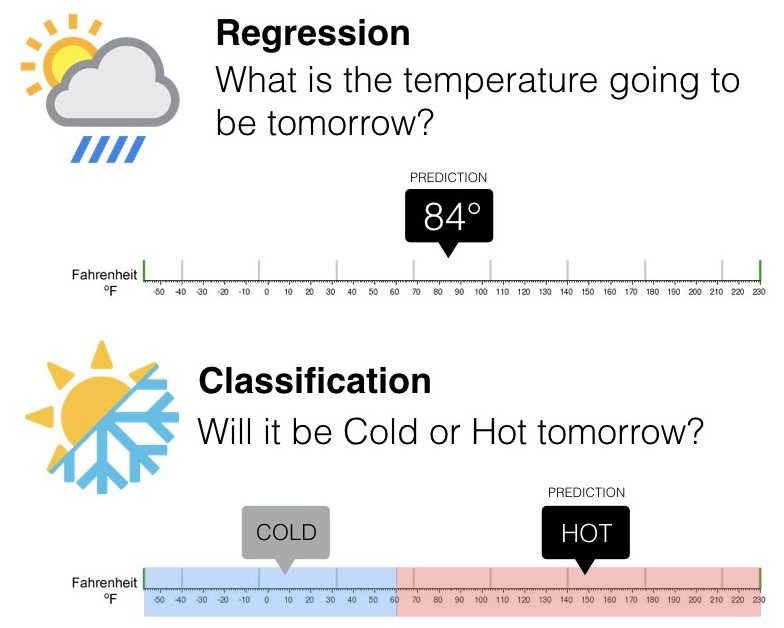

In [1]:
from IPython import display
display.Image("Image/ClassificationVSRegression.png")

### Metrics Regression

More detail at (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

Metrics as:
- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean squared error (RMSE)
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE)
- R-square (R^2)

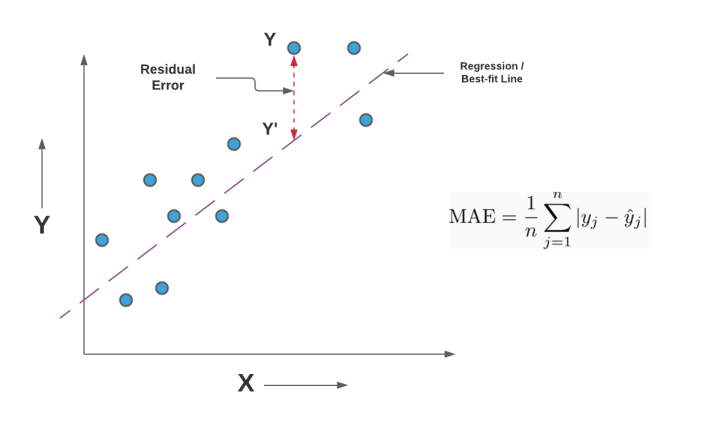

In [3]:
display.Image("Image/MAE_Graph.png")

### Metrics Classification

More detail at (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

The evelaution of perfomance ar based on the Confusion Matrix
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply Area Under Curve (AUC)
- Matthew Correlation Coefficient


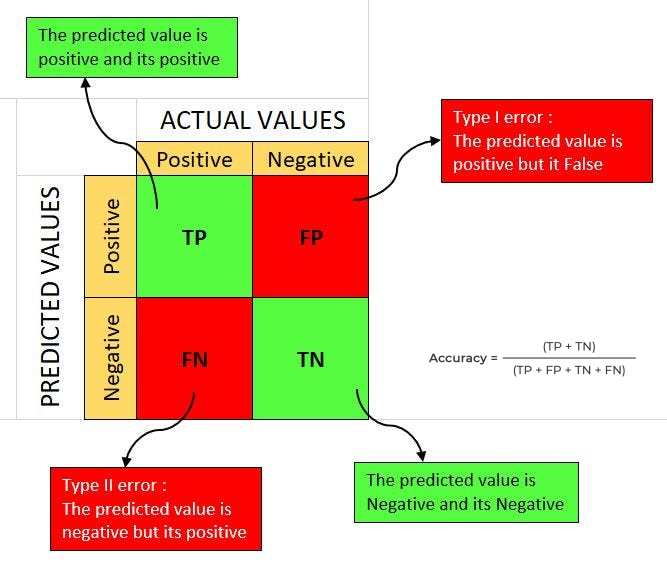

In [5]:
display.Image("Image/ConfusionMatrix1.png")

## Regression Example

In [9]:
#necessary imports
from sklearn import datasets
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Linear Regression - Generated Dataset

In this part, all the code is already written. We ask you the deeply understand what it does and to play with the parameters.

It is highly recommanded to read the documentation there: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

In [10]:
from sklearn.datasets import make_regression

In [23]:
X, y, coeff = make_regression(n_samples=1000, n_features=2, bias = 2.0, coef=True, noise=2, random_state=42)

**Question 1:** With the help of the documentation, explain the different parameters. Try with and without noise, with dimension 1, 2 and more.

your answer here

#### Visualization

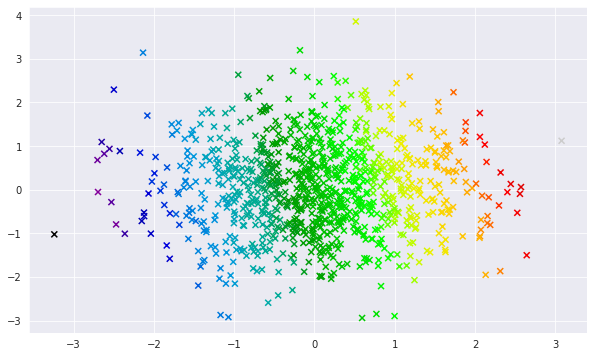

In [24]:
# This cells display 2d features with the colors representing the variations of y values
colors = [cm.nipy_spectral(float(i) / 255) for i in range(256)]

max = np.max(y)
min = np.min(y)
ycol = 255*(y-min)/(max-min)
ycol = ycol.astype('int')

col = [colors[yc] for yc in ycol]
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color = col, marker="x")

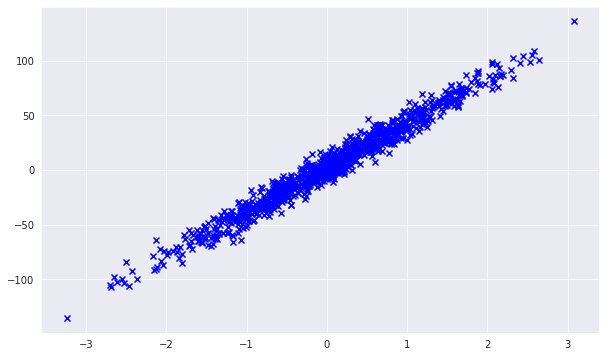

In [26]:
#thist cell will plot 1d data with their y values
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color = 'b', marker="x")

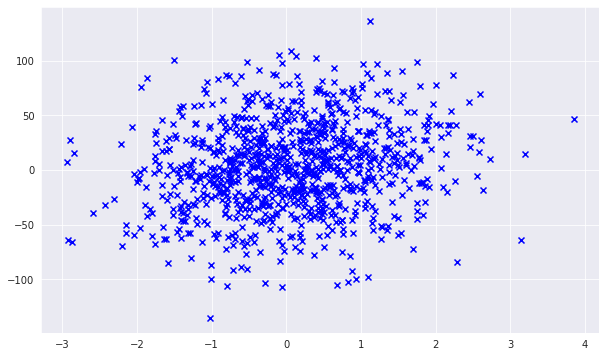

In [27]:
#thist cell will plot 1d data with their y values
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color = 'b', marker="x")

What can you understand from this plot?

#### Split dataset in Train and Test

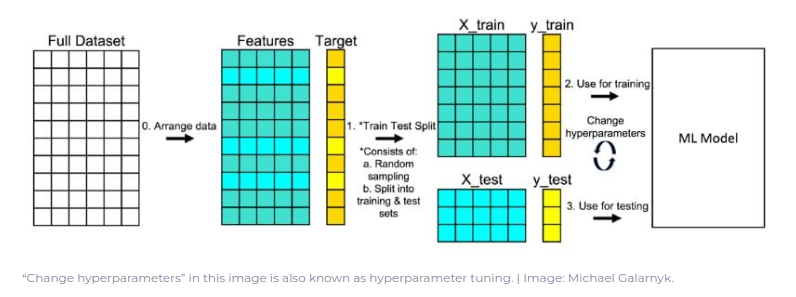

In [28]:
display.Image("Image/Split Dataset.png")

In [54]:
# Splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
# Shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 2)
(800,)
(200, 2)
(200,)


In [71]:
# construction of linear regression and learning
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred_train = lr.predict(X_train)

In [73]:
# Predict on Test dataset
y_pred_test = lr.predict(X_test)

#### Evaluation of the linear regression

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Train MAE score: ", mean_absolute_error(y_train, y_pred_train))
print("Test MAE score: ", mean_absolute_error(y_test, y_pred_test))

Train MAE score:  1.5958788036465736
Test MAE score:  1.4845190868210347


In [75]:
print("Train MSE score: ", mean_squared_error(y_train, y_pred_train))
print("Test MSE score: ", mean_squared_error(y_test, y_pred_test))

print("Train R2 score: ", r2_score(y_train, y_pred_train))
print("Test R2 score: ", r2_score(y_test, y_pred_test))

Train MSE score:  3.8919047695514597
Test MSE score:  3.8074761773301837
Train R2 score:  0.997553513080001
Test R2 score:  0.9975560867599782


**Question 2:** What does this score represent? Is it good? (try to answer using the different options proposed for the dataset creation).

In [77]:
# answer here

We can also compare the true linear coefficients with the coefficients founded by the linear regression in the case of generated dataset:

In [61]:
print(coeff)

[40.71064891  6.60098441]


In [62]:
print(lr.coef_, lr.intercept_)

[40.78194451  6.66896362] 2.0051444261263693


#### Overfit/Underfit

In [81]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Generate training samples
x_train = np.random.rand(100,1)
y_train = - x_train + 3 * (x_train ** 2) - 2 * (x_train ** 3) + 2 + np.random.rand(100,1) * 0.1

# Generate some outlier points in the dataset
x_train_noise = np.random.rand(10,1)
y_train_noise = - x_train_noise + 3 * (x_train_noise ** 2) - 2 * (x_train_noise ** 3) + 2 \
                + np.random.rand(10,1) * 0.5

# Combine 'normal' points and 'outlier' points to a single training set
x_train = np.concatenate((x_train, x_train_noise), axis=0)
y_train = np.concatenate((y_train, y_train_noise), axis=0)

# Generate test samples
x_test = np.random.rand(20,1)
y_test = - x_test + 3 * (x_test ** 2) - 2 * (x_test ** 3) + 2 + np.random.rand(20,1) * 0.1

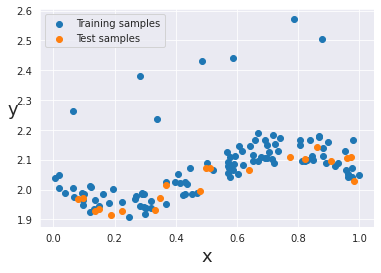

In [82]:
# Plot training samples
plt.scatter(x_train,y_train, label='Training samples')
plt.scatter(x_test,y_test, label='Test samples')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.legend()

##### Degree 1: Underfit

In [83]:
# Generate polynomial features
polynomial_features= PolynomialFeatures(degree=1)
x_train_poly = polynomial_features.fit_transform(x_train)[:,1:]
x_test_poly = polynomial_features.fit_transform(x_test)[:,1:]

# Create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(x_train_poly, y_train)

# print fitted model
print('Coef:', model.coef_, 'Intercept:', model.intercept_)

print('Train score:', mean_squared_error(model.predict(x_train_poly), y_train))
print('Test score:', mean_squared_error(model.predict(x_test_poly), y_test))

Coef: [[0.19667188]] Intercept: [1.97452848]
Train score: 0.010109663857493054
Test score: 0.004156898735858607


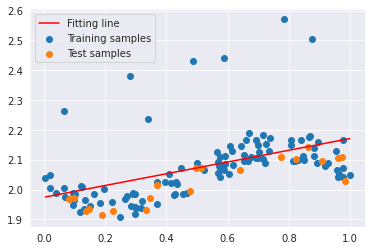

In [84]:
idx = np.argsort(x_train, axis=0)[:,0]
plt.plot(x_train[idx], model.predict(x_train_poly)[idx], 'r', label='Fitting line')
plt.scatter(x_train,y_train, label='Training samples')
plt.scatter(x_test,y_test, label='Test samples')
plt.legend()

##### Correct Polinomial

In [85]:
# Generate polynomial features
polynomial_features= PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(x_train)[:,1:]
x_test_poly = polynomial_features.fit_transform(x_test)[:,1:]

# Create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(x_train_poly, y_train)

# print fitted model
print('Coef:', model.coef_, 'Intercept:', model.intercept_)

print('Train score:', mean_squared_error(model.predict(x_train_poly), y_train))
print('Test score:', mean_squared_error(model.predict(x_test_poly), y_test))

Coef: [[-0.88060979  2.80457071 -1.91820354]] Intercept: [2.05560772]
Train score: 0.008719399687657593
Test score: 0.002050753493225516


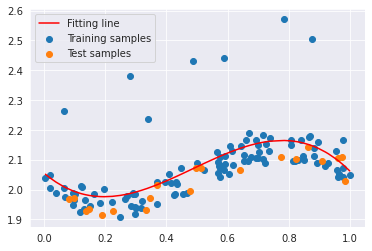

In [86]:
idx = np.argsort(x_train, axis=0)[:,0]
plt.plot(x_train[idx], model.predict(x_train_poly)[idx], 'r', label='Fitting line')
plt.scatter(x_train,y_train, label='Training samples')
plt.scatter(x_test,y_test, label='Test samples')
plt.legend()

##### High Degree: Overfit

In [87]:
# Generate polynomial features
polynomial_features= PolynomialFeatures(degree=30)
x_train_poly = polynomial_features.fit_transform(x_train)[:,1:]
x_test_poly = polynomial_features.fit_transform(x_test)[:,1:]

# Create linear regression model
model = LinearRegression()

# fit model to polynomial data
model.fit(x_train_poly, y_train)

# print fitted model
print('Coef:', model.coef_, 'Intercept:', model.intercept_)

print('Train score:', mean_squared_error(model.predict(x_train_poly), y_train))
print('Test score:', mean_squared_error(model.predict(x_test_poly), y_test))

Coef: [[ 8.28289578e+01 -8.07402269e+03  3.55463693e+05 -8.73465837e+06
   1.34635418e+08 -1.39715395e+09  1.01956650e+10 -5.36564212e+10
   2.05731366e+11 -5.71312964e+11  1.11423141e+12 -1.39616713e+12
   7.89243361e+11  4.97397183e+11 -1.00897123e+12 -2.02694059e+10
   9.08775805e+11 -8.09682266e+10 -8.26729921e+11  1.30013481e+10
   7.69301309e+11  1.01906963e+11 -7.18781635e+11 -1.69258104e+11
   7.06106495e+11  6.98776631e+10 -7.70242535e+11  6.10598088e+11
  -2.05225544e+11  2.64873630e+10]] Intercept: [1.79651864]
Train score: 0.007054390580891429
Test score: 0.015296321480631555


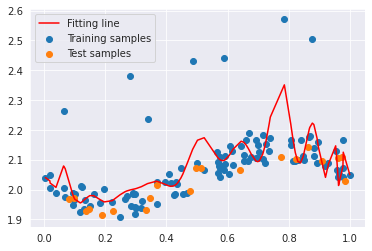

In [88]:
idx = np.argsort(x_train, axis=0)[:,0]
plt.plot(x_train[idx], model.predict(x_train_poly)[idx], 'r', label='Fitting line')
plt.scatter(x_train,y_train, label='Training samples')
plt.scatter(x_test,y_test, label='Test samples')
plt.legend()

### Linear Regression: Diabetes Dataset

In [76]:
# loading the dataset
diab = datasets.load_diabetes()
X = diab.data
y = diab.target

**Question 4:** how many data ?

In [ ]:
# answer here

**Question 5**: type of data ? dimension of data ? type of labels ?

In [ ]:
# answer here

**Question 5bis**: What are the features ?

In [ ]:
# answer here

**Question 6a:** Split train/test dataset

In [ ]:
# answer here

**Question 6b:** How many train data? How many test data?

In [ ]:
# answer here

**Question 7:** Linear regression. Create a default linear regression and learn this regression.

In [ ]:
# answer here

**Question 8a:** Print the score. What do they represent?

In [ ]:
# answer here

**Question 8b:** What are the MSE and RMSE values?

In [ ]:
# answer here

**Question 9:** How could you test a non linear regression as for example a second degree polynom

In [ ]:
# answer here